This notebook analyses the data generated in the benchmark of latentcor. Here we analyse different settings of latentcor and its effect on runtime, mainly the use_nearPD setting 

In [2]:
import scanpy as sc
import mudata as md
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## First benchmark 
### 10 experiments, increasing step size of 25 (HVG genes), starting with 25 genes, filter genes and cells

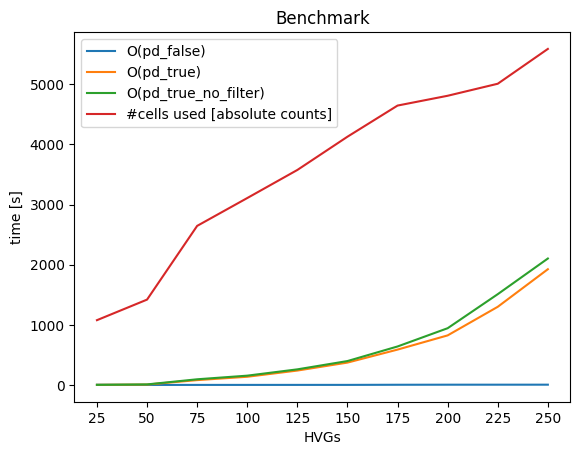

In [70]:
x = [25, 50, 75, 100, 125, 150, 175, 200, 225, 250]
pd_false = [2.16, 0.15, 0.4, 0.44, 0.64, 0.84, 2.82, 3.9, 4.0, 4.21]
pd_true = [1.41, 6.31, 80.21, 135.91, 239.03, 371.51, 587.68, 823.88, 1299.45, 1924.31]
pd_true_no_filter = [1.44, 8.56, 93.88, 154.19, 259.02, 397.03, 639.64, 943.25, 1509.44, 2102.27]
n_cells = [1077, 1419, 2645, 3108, 3575, 4128, 4646, 4809, 5009, 5588]
plt.plot(x, pd_false, label='O(pd_false)')
plt.plot(x, pd_true, label='O(pd_true)')
plt.plot(x, pd_true_no_filter, label='O(pd_true_no_filter)')
plt.plot(x, n_cells, label='#cells used [absolute counts]')
plt.xticks(x)
plt.xlabel('HVGs')
plt.ylabel('time [s]')
plt.legend()
plt.title('Benchmark')
plt.show()

Printing out the eigenvalues for trials of the respective use_nearPD setting(true/false)

In [42]:
bm1_25_f = np.load(f'../data/benchmark_latentcor/filter_gc_HVG_{25}_false.npy', allow_pickle=True)
bm1_25_t = np.load(f'../data/benchmark_latentcor/filter_gc_HVG_{25}_true.npy', allow_pickle=True)
R_bm1_25_f = np.atleast_1d(bm1_25_f)[0]['R']
R_bm1_25_t = np.atleast_1d(bm1_25_t)[0]['R']

In [45]:
R_bm1_25_f_evals, R_bm1_25_f_evecs = np.linalg.eig(R_bm1_25_f)
R_bm1_25_f_evals

array([-9.17901405,  6.71720717,  5.46588216, -1.20613663,  2.9699735 ,
       -0.86198733,  2.56090727,  2.41333984, -0.44347842,  2.18598622,
       -0.18847548,  1.90721329,  1.73511286,  1.53615513,  1.51624059,
        1.41394476,  0.19175526,  0.32780575,  1.2135284 ,  1.08641662,
        0.97689598,  0.84282135,  0.75984676,  0.6029932 ,  0.4550658 ])

In [47]:
R_bm1_25_t_evals, R_bm1_25_t_evecs = np.linalg.eig(R_bm1_25_t)
R_bm1_25_t_evals

array([5.62921349e+00+0.00000000e+00j, 4.36752363e+00+0.00000000e+00j,
       2.23246257e+00+0.00000000e+00j, 1.79048422e+00+0.00000000e+00j,
       1.66727128e+00+0.00000000e+00j, 1.53941495e+00+0.00000000e+00j,
       4.94433499e-02+0.00000000e+00j, 1.88887914e-01+0.00000000e+00j,
       3.08401520e-01+0.00000000e+00j, 4.49230240e-01+0.00000000e+00j,
       1.31162168e+00+0.00000000e+00j, 5.91012964e-01+0.00000000e+00j,
       1.15780564e+00+0.00000000e+00j, 1.07650344e+00+0.00000000e+00j,
       9.41226440e-01+0.00000000e+00j, 8.11278666e-01+0.00000000e+00j,
       8.80217995e-01+0.00000000e+00j, 1.00000000e-03+0.00000000e+00j,
       1.00000000e-03+0.00000000e+00j, 1.00000000e-03+6.68962405e-17j,
       1.00000000e-03-6.68962405e-17j, 1.00000000e-03+8.41289800e-17j,
       1.00000000e-03-8.41289800e-17j, 1.00000000e-03+0.00000000e+00j,
       1.00000000e-03+0.00000000e+00j])

In [50]:
bm1_50_f = np.load(f'../data/benchmark_latentcor/filter_gc_HVG_{50}_false.npy', allow_pickle=True)
bm1_50_t = np.load(f'../data/benchmark_latentcor/filter_gc_HVG_{50}_true.npy', allow_pickle=True)
R_bm1_50_f = np.atleast_1d(bm1_50_f)[0]['R']
R_bm1_50_t = np.atleast_1d(bm1_50_t)[0]['R']

In [51]:
R_bm1_50_f_evals, R_bm1_50_f_evecs = np.linalg.eig(R_bm1_50_f)
R_bm1_50_f_evals

array([ 17.34859995, -13.53756022,   6.40629774,   5.23557984,
        -3.08773951,   3.85495505,  -1.98859098,   3.17413218,
        -1.67587863,  -1.42264204,  -1.33747741,   2.8568428 ,
         2.74534588,   2.57184277,   2.45391939,   2.27921469,
         2.11548909,   2.08877552,  -0.68197694,  -0.55248735,
         1.77152878,   1.69472992,   1.60519633,   1.46730081,
         1.43527603,   1.3152849 ,  -0.38827493,  -0.22408957,
        -0.20406194,   1.08205396,   1.05153978,   0.86685531,
         0.87306545,   0.70400437,  -0.04669426,   0.58234602,
         0.55987826,   0.5178998 ,   0.06764991,   0.35461832,
         0.29758222,   0.18655424,   0.21860953,   0.12384135,
         0.2406636 ])

In [52]:
R_bm1_50_t_evals, R_bm1_50_t_evecs = np.linalg.eig(R_bm1_50_t)
R_bm1_50_t_evals

array([1.54417692e+01+0.00000000e+00j, 4.93378018e+00+0.00000000e+00j,
       3.93646916e+00+0.00000000e+00j, 2.46545698e+00+0.00000000e+00j,
       2.13343549e+00+0.00000000e+00j, 8.76949582e-02+0.00000000e+00j,
       1.87709534e-01+0.00000000e+00j, 1.75518172e+00+0.00000000e+00j,
       1.69995129e+00+0.00000000e+00j, 1.62402594e+00+0.00000000e+00j,
       1.60273217e+00+0.00000000e+00j, 1.44215829e+00+0.00000000e+00j,
       3.00987724e-01+0.00000000e+00j, 4.11180852e-01+0.00000000e+00j,
       5.49949506e-01+0.00000000e+00j, 6.60766999e-01+0.00000000e+00j,
       7.82234676e-01+0.00000000e+00j, 8.22051741e-01+0.00000000e+00j,
       1.13754160e+00+0.00000000e+00j, 1.08424173e+00+0.00000000e+00j,
       9.31026245e-01+0.00000000e+00j, 9.86653971e-01+0.00000000e+00j,
       1.00000000e-03+0.00000000e+00j, 1.00000000e-03+0.00000000e+00j,
       1.00000000e-03+0.00000000e+00j, 1.00000000e-03+3.34141673e-17j,
       1.00000000e-03-3.34141673e-17j, 1.00000000e-03+0.00000000e+00j,
      

In [56]:
bm1_100_f = np.load(f'../data/benchmark_latentcor/filter_gc_HVG_{100}_false.npy', allow_pickle=True)
bm1_100_t = np.load(f'../data/benchmark_latentcor/filter_gc_HVG_{100}_true.npy', allow_pickle=True)
R_bm1_100_f = np.atleast_1d(bm1_100_f)[0]['R']
R_bm1_100_t = np.atleast_1d(bm1_100_t)[0]['R']

In [57]:
R_bm1_100_f_evals, R_bm1_100_f_evecs = np.linalg.eig(R_bm1_100_f)
R_bm1_100_f_evals

array([ 5.06413995e+01, -2.03432915e+01,  1.28876014e+01,  7.81166051e+00,
       -6.17681303e+00, -4.95404088e+00,  5.90948600e+00,  5.34899241e+00,
        5.04915576e+00, -3.94644110e+00, -3.28803491e+00,  4.63295443e+00,
        4.49819717e+00,  4.09701020e+00,  3.86949705e+00, -2.78470640e+00,
       -2.73689676e+00,  3.53654449e+00,  3.38420307e+00,  3.31296724e+00,
        3.15929467e+00, -2.31802599e+00, -2.19948048e+00, -1.95065657e+00,
        2.70676137e+00,  2.58446261e+00,  2.50030132e+00,  2.51391319e+00,
       -1.74322838e+00,  2.20399591e+00, -1.53621751e+00, -1.39791233e+00,
       -1.31636142e+00,  2.08148347e+00,  1.95934229e+00,  1.87518124e+00,
        1.78942309e+00, -1.26262420e+00,  1.76431115e+00,  1.53335604e+00,
       -1.10610631e+00, -1.02578020e+00, -9.60213930e-01,  1.43285329e+00,
        1.38070412e+00, -8.33186044e-01, -7.08476541e-01, -6.11727961e-01,
        1.23714397e+00,  1.18485917e+00,  1.10572920e+00,  9.90284390e-01,
        1.03879468e+00, -

In [58]:
R_bm1_100_t_evals, R_bm1_100_t_evecs = np.linalg.eig(R_bm1_100_t)
R_bm1_100_t_evals

array([4.70074710e+01+0.00000000e+00j, 1.02543480e+01+0.00000000e+00j,
       5.40988139e+00+0.00000000e+00j, 3.78536019e+00+0.00000000e+00j,
       3.35596353e+00+0.00000000e+00j, 2.96134951e+00+0.00000000e+00j,
       2.71796365e+00+0.00000000e+00j, 2.57743734e+00+0.00000000e+00j,
       2.00485556e+00+0.00000000e+00j, 2.03418950e+00+0.00000000e+00j,
       1.77803705e+00+0.00000000e+00j, 1.60410804e+00+0.00000000e+00j,
       1.52189127e+00+0.00000000e+00j, 9.24876722e-01+0.00000000e+00j,
       1.14264074e+00+0.00000000e+00j, 1.11423269e+00+0.00000000e+00j,
       8.38900540e-01+0.00000000e+00j, 1.01487342e+00+0.00000000e+00j,
       6.03661016e-01+0.00000000e+00j, 5.50111804e-01+0.00000000e+00j,
       4.54338573e-01+0.00000000e+00j, 3.64257568e-01+0.00000000e+00j,
       4.30527663e-01+0.00000000e+00j, 2.73854712e-01+0.00000000e+00j,
       1.27036342e-01+0.00000000e+00j, 7.88322019e-02+0.00000000e+00j,
       1.00000000e-03+7.33001508e-17j, 1.00000000e-03-7.33001508e-17j,
      

## Second benchmark 
### 10 experiments, increasing step size of 25 (HVG genes), starting with 25 genes

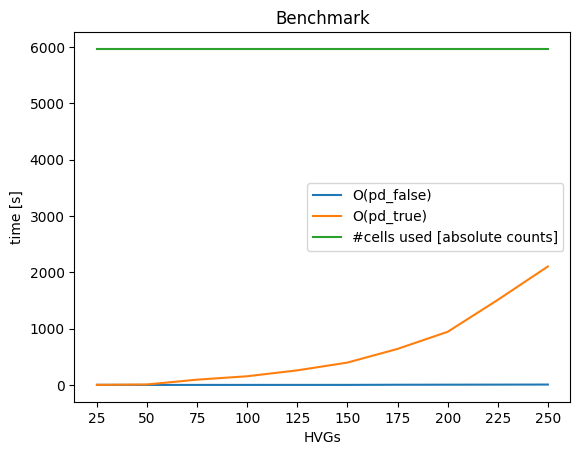

In [69]:
x = [25, 50, 75, 100, 125, 150, 175, 200, 225, 250]
pd_false = [2.1, 0.37, 0.53, 0.62, 0.87, 0.99, 3.53, 4.57, 5.7, 6.87]
pd_true = [1.44, 8.56, 93.88, 154.19, 259.02, 397.03, 639.64, 943.25, 1509.44, 2102.27]
n_cells = [5964]*10
plt.plot(x, pd_false, label='O(pd_false)')
plt.plot(x, pd_true, label='O(pd_true)')
plt.plot(x, n_cells, label='#cells used [absolute counts]')
plt.xticks(x)
plt.xlabel('HVGs')
plt.ylabel('time [s]')
plt.legend()
plt.title('Benchmark')
plt.show()

## Combined benchmark plot

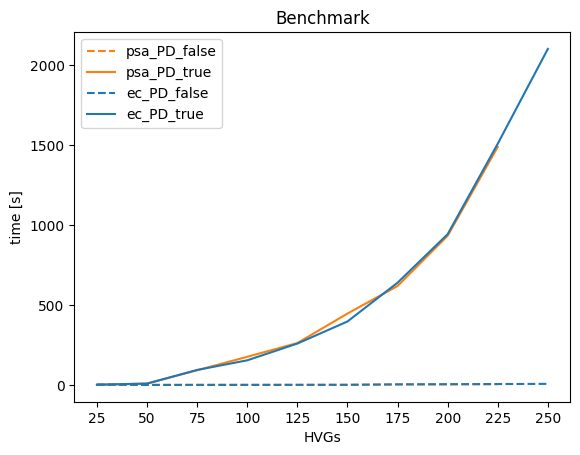

In [19]:
x = [25, 50, 75, 100, 125, 150, 175, 200, 225, 250]
x_small = [25, 50, 75, 100, 125, 150, 175, 200, 225]
ec_cells = [5964]*10
psa_cells = [1306]*10

psa_false = [1.98, 0.21, 0.36, 0.57, 0.66, 0.92, 3.57, 3.86, 4.88]
psa_true = [1.33, 8.76, 92.07, 176.09, 262.29, 446.49, 619.13, 933.38, 1489.85]

ec_false = [2.1, 0.37, 0.53, 0.62, 0.87, 0.99, 3.53, 4.57, 5.7, 6.87]
ec_true = [1.44, 8.56, 93.88, 154.19, 259.02, 397.03, 639.64, 943.25, 1509.44, 2102.27]

plt.plot(x_small, psa_false, label='psa_PD_false', color='C1', linestyle='--')
plt.plot(x_small, psa_true, label='psa_PD_true', color='C1')

plt.plot(x, ec_false, label='ec_PD_false', color='C0', linestyle='--')
plt.plot(x, ec_true, label='ec_PD_true', color='C0')

#plt.plot(x, psa_cells, label='#cells psa')
#plt.plot(x, ec_cells, label='#cells ec')

plt.xticks(x)
plt.xlabel('HVGs')
plt.ylabel('time [s]')
plt.legend()
plt.title('Benchmark')
plt.show()